# Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

## KMeans Clustering

In [3]:
digits = load_digits()

Let's define parameters of KMeans clustering algorithm in a dictionarry object

In [4]:
kmeans_kwargs = {"init": "random",
                    "n_init": 50,
                    "max_iter": 500,
                    "random_state": 0}

In [5]:
pipeline = Pipeline([("Preprocess", MinMaxScaler()),
                    ("Clustering", KMeans(n_clusters=10, **kmeans_kwargs))])

pipeline.fit(digits.data)

Pipeline(steps=[('Preprocess', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

In [6]:
cluster_centers = pipeline[-1].cluster_centers_

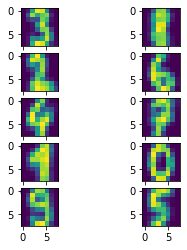

In [8]:
#visualising cluster centroids
fig, ax = plt.subplots(5, 2, figsize=(4,4))
for i, j in zip(ax.flat, cluster_centers.reshape(10, 8, 8)):
    i.imshow(j)

### Finding optimal K: Elbow method

In [9]:
sse_digit = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    sse_digit.append(kmeans.inertia_)

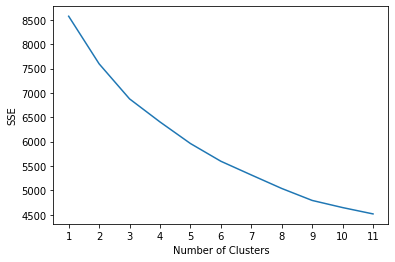

In [10]:
# plotting

plt.plot(range(1,12), sse_digit)
plt.xticks(range(1,12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

* Slight elbow at $k=9$

### Silhoutte

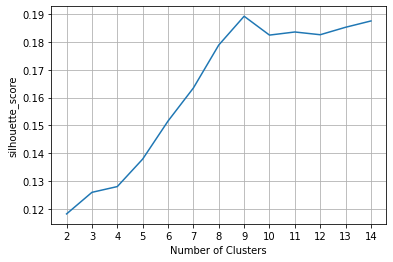

In [11]:
sil_coef_digits = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_digits)
    score = silhouette_score(digits.data, kmeans.labels_)
    sil_coef_digits.append(score)

plt.plot(range(2,15), sil_coef_digits)
plt.xticks(range(2,15))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_score")
plt.grid(True)
plt.show()

## Heirarchical Agglomerative Clustering(HAC)

Two Approaches
* Bottoms up - Starts by considering each data point as a cluster and then combines the closest clusters to form larger clusters
* Top down - Entire data set is considered as one cluster, which is divide into smaller clusters in each step

Linkage
* A strategy to aggregate clusters
* 4 types
    * Single linkage -  Distance between closest points in two clusters
    * Average linkage -  Average distance over all possible pairs
    * Complete linkage - Distance between farthest points in two clusters
    * Ward's Linkage -  Sum of squared distances within the clusters

## Algorithm

1. Calculate the distance matrix between pairs of clusters
2. While all the objects are clustered into one.
    * Detect the two closest groups and merge them

## An Example

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

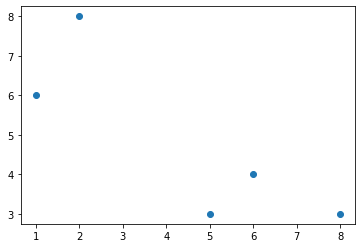

In [13]:
X = np.array([(8,3), (5,3), (6,4), (1,6), (2,8)])
scaled_X = normalize(X)
plt.scatter(X[:,0], X[:,1])
plt.show()

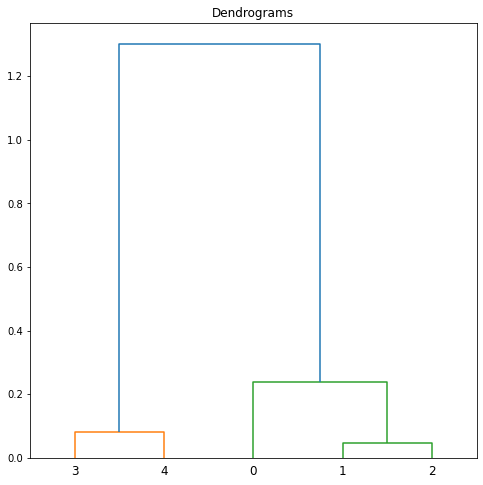

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8,8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(scaled_X, method='ward'))

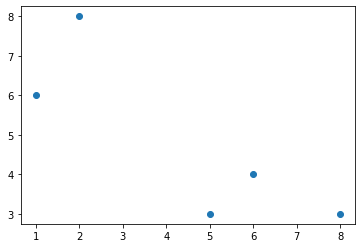

In [22]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([(8,3), (5,3), (6,4), (1,6), (2,8)])
plt.scatter(X[:,0], X[:,1])

In [23]:
clustering = AgglomerativeClustering().fit(X)
clustering.labels_

array([0, 0, 0, 1, 1], dtype=int64)

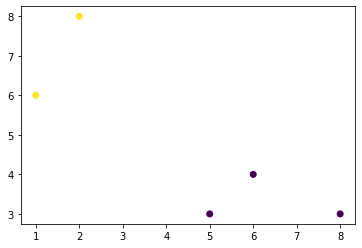

In [24]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)
plt.show()